In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")
from Functions import *
import matplotlib as mpl
# Axes
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
# ticks
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
# grid
mpl.rcParams['grid.color'] = 'gray'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
# legend
mpl.rcParams['legend.fontsize'] = 14
# figure
mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.autolayout'] = True

In [2]:
female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
number_of_nodes = len(np.unique(male)) + len(np.unique(female))

In [3]:
aggregation = 30 # days
net_list = {}
net_list["None" ], _ = temporal_network_list(female, male, time, aggregation)
net_list["time" ], _ = temporal_network_list(female, male, time, aggregation, randomize="time" , seed=19836)
net_list["nodes"], _ = temporal_network_list(female, male, time, aggregation, randomize="nodes", seed=96848)

In [4]:
node_number = {"None":[], "time":[], "nodes":[]}
edge_number = {"None":[], "time":[], "nodes":[]}
connected_components = {"None":[], "time":[], "nodes":[]}

for key, val in net_list.items():
    val.pop()
    for net in val:
        node_number[key].append(len(list(net.nodes)))
        edge_number[key].append(len(list(net.edges)))
        connected_components[key].append(nx.number_connected_components(net))

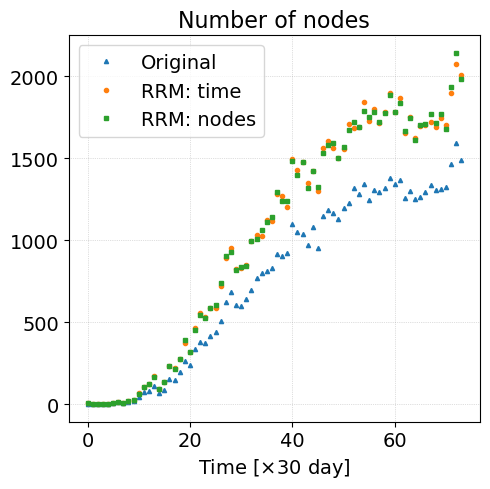

In [5]:
plt.title("Number of nodes")
plt.plot(node_number["None" ], "^", markersize=3, label="Original")
plt.plot(node_number["time" ], "o", markersize=3, label="RRM: time")
plt.plot(node_number["nodes"], "s", markersize=3, label="RRM: nodes")
plt.xlabel("Time [$\\times 30$ day]")
plt.legend()
plt.savefig("./Figure/Temporal/Number_nodes.pdf")
plt.show()

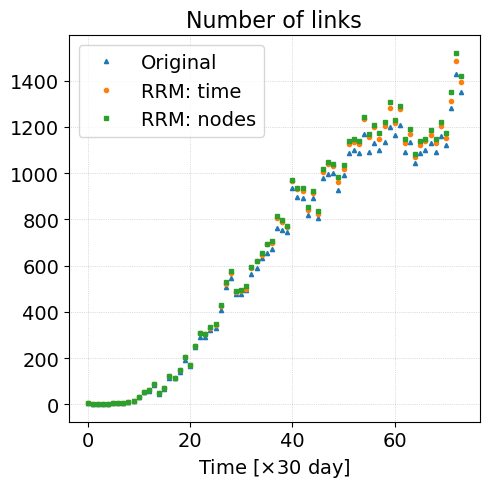

In [6]:
plt.title("Number of links")
plt.plot(edge_number["None" ], "^", markersize=3, label="Original")
plt.plot(edge_number["time" ], "o", markersize=3, label="RRM: time")
plt.plot(edge_number["nodes"], "s", markersize=3, label="RRM: nodes")
plt.xlabel("Time [$\\times 30$ day]")
plt.legend()
plt.savefig("./Figure/Temporal/Number_edges.pdf")
plt.show()

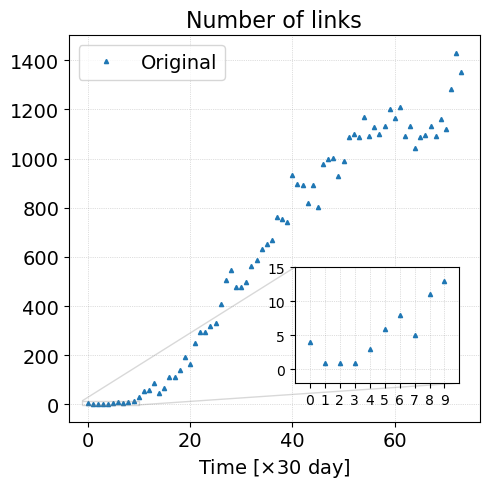

In [7]:
plt.title("Number of links")
plt.plot(edge_number["None" ], "^", markersize=3, label="Original")
plt.xlabel("Time [$\\times 30$ day]")
plt.legend()
ax = plt.gca()
axin = ax.inset_axes([.55, .1, .4, .3])
axin.plot(edge_number["None" ], "^", markersize=3)
axin.set_xlim(-1,10)
axin.set_ylim(-2,15)
axin.tick_params(labelsize=10)
axin.set_xticks(range(10))
ax.indicate_inset_zoom(axin, edgecolor="gray", alpha=.3)
plt.savefig("./Figure/Temporal/Number_edges_zoom.pdf")
plt.show()

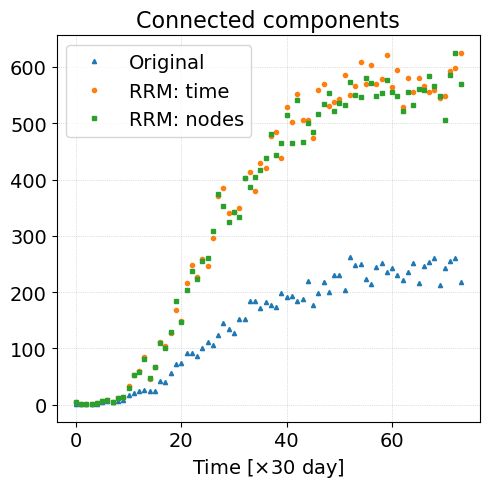

In [8]:
plt.title("Connected components")
plt.plot(connected_components["None" ], "^", markersize=3, label="Original")
plt.plot(connected_components["time" ], "o", markersize=3, label="RRM: time")
plt.plot(connected_components["nodes"], "s", markersize=3, label="RRM: nodes")
plt.xlabel("Time [$\\times 30$ day]")
plt.legend()
plt.savefig("./Figure/Temporal/connected_components.pdf")
plt.show()

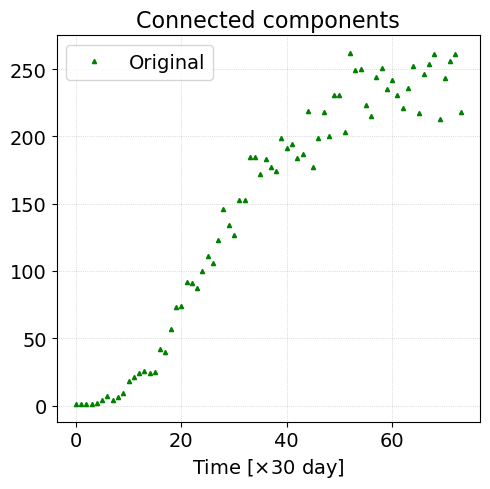

In [9]:
plt.title("Connected components")
plt.plot(connected_components["None" ], "g^", markersize=3, label="Original")
plt.xlabel("Time [$\\times 30$ day]")
plt.legend()
plt.savefig("./Figure/Temporal/connected_components_original.pdf")
plt.show()

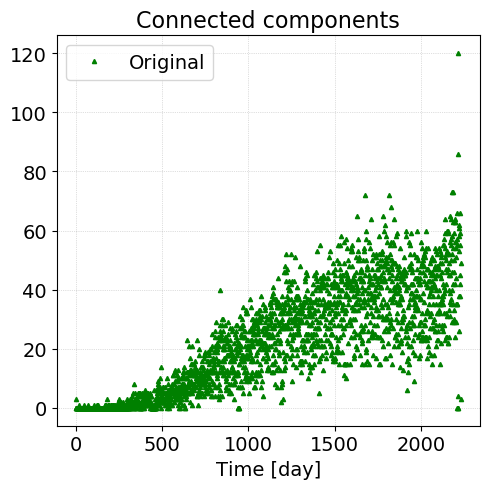

In [10]:
aggregation = 1 # days
net_list, _ = temporal_network_list(female, male, time, aggregation)
node_number, edge_number, connected_components = [], [], []
for net in net_list:
    node_number.append(len(list(net.nodes)))
    edge_number.append(len(list(net.edges)))
    connected_components.append(nx.number_connected_components(net))
plt.title("Connected components")
plt.plot(connected_components, "g^", markersize=3, label="Original")
plt.xlabel("Time [day]")
plt.legend()
plt.savefig("./Figure/Temporal/connected_components_per_day.pdf")
plt.show()